In [ ]:
import os
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

import pandas as pd



In [ ]:
# set active run directory
path = "/home/ubuntu/veri_analizi"
os.chdir(path)

#create spark session
spark = SparkSession.builder.appName("APRON-VA").getOrCreate()
spark


# SPARK UI: 10.8.131.209:4040

In [ ]:
%pwd

In [4]:
# Örnek veri oluşturma
veri = [("A", 28), ("B", 45), ("C", 33), ("D", 52), ("E", 40)]
df = spark.createDataFrame(veri, ["Kategori", "Değer"])

# Pyspark DataFrame'i gösterme
df.show()


+--------+-----+
|Kategori|Değer|
+--------+-----+
|       A|   28|
|       B|   45|
|       C|   33|
|       D|   52|
|       E|   40|
+--------+-----+


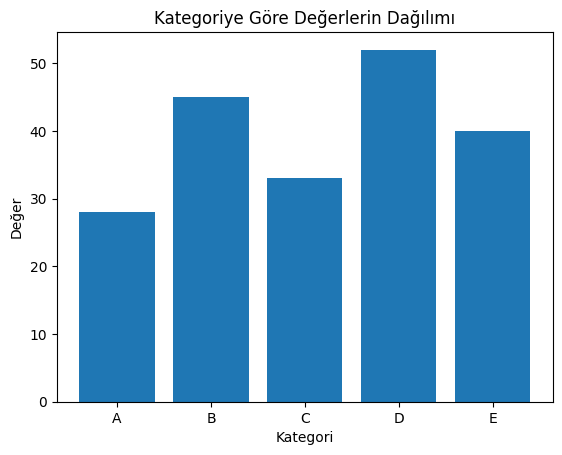

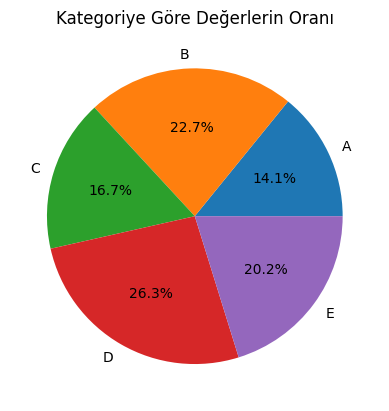

In [5]:
pandas_df = df.toPandas()

# Görselleştirme için Matplotlib kullanma
import matplotlib.pyplot as plt

# Sütun grafiği çizme
plt.bar(pandas_df["Kategori"], pandas_df["Değer"])
plt.xlabel("Kategori")
plt.ylabel("Değer")
plt.title("Kategoriye Göre Değerlerin Dağılımı")
plt.show()

# Dairesel grafik çizme
plt.pie(pandas_df["Değer"], labels=pandas_df["Kategori"], autopct='%1.1f%%')
plt.title("Kategoriye Göre Değerlerin Oranı")
plt.show()



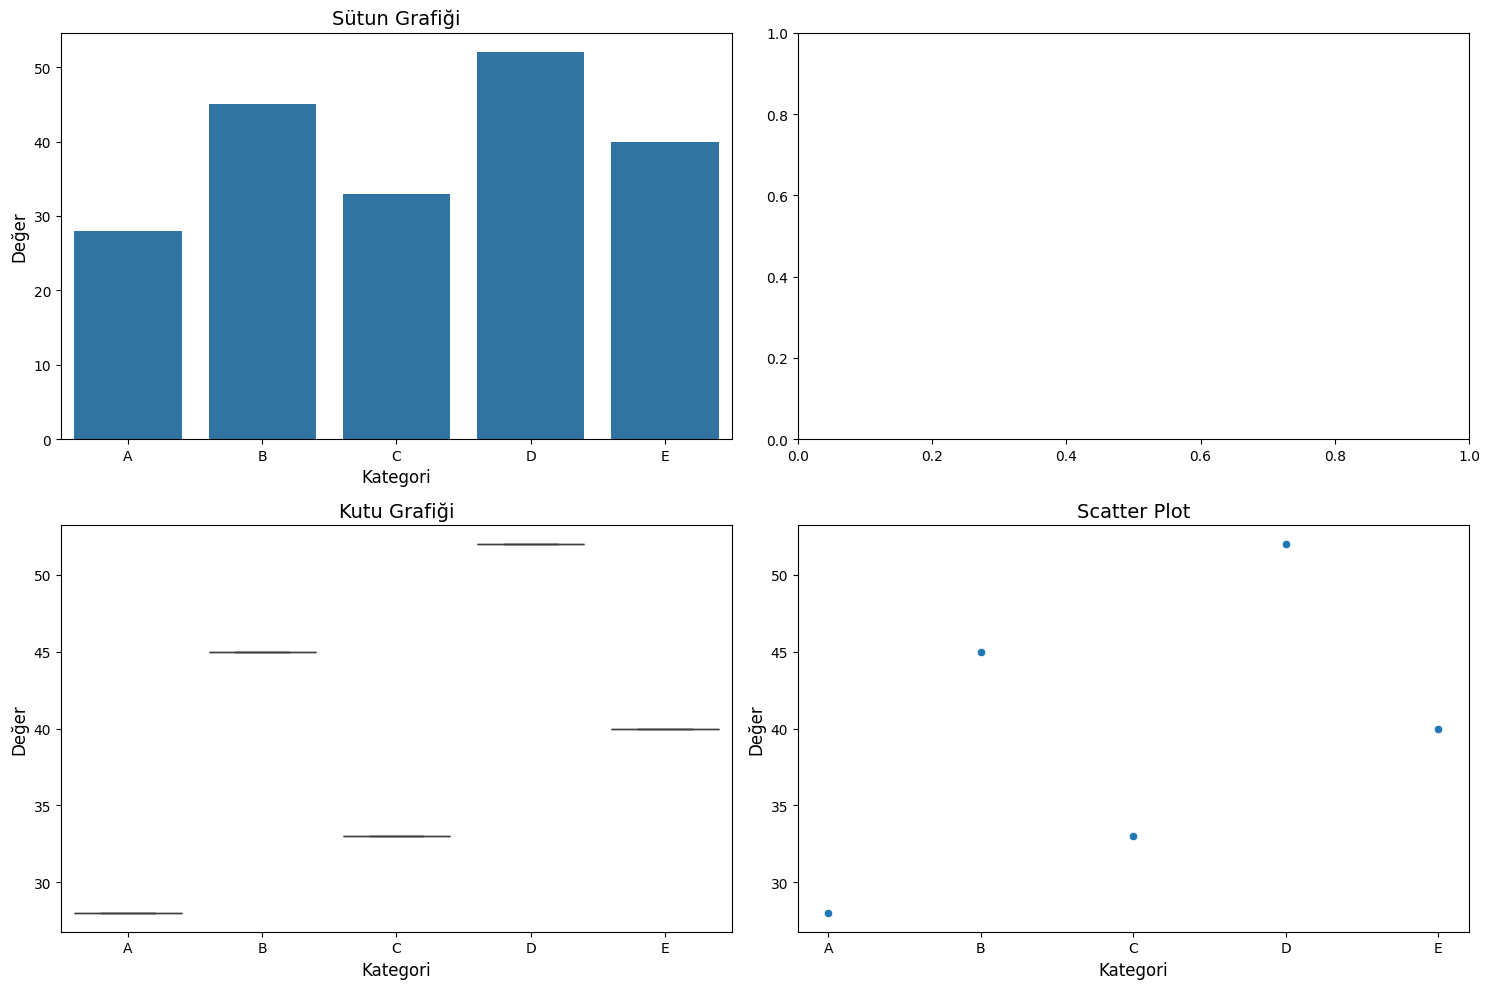

In [7]:
# Seaborn ve Plotly yüklemeleri
import seaborn as sns
import plotly.express as px


# Subplotlar oluşturma
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Sütun grafiği çizme (Seaborn ile)
sns.barplot(data=pandas_df, x="Kategori", y="Değer", ax=axs[0, 0])
axs[0, 0].set_xlabel("Kategori", fontsize=12)
axs[0, 0].set_ylabel("Değer", fontsize=12)
axs[0, 0].set_title("Sütun Grafiği", fontsize=14)

# Dairesel grafik çizme (Plotly ile)
fig.add_subplot(axs[0, 1])
fig = px.pie(pandas_df, values="Değer", names="Kategori", title="Dairesel Grafik")
fig.show()

# Kutu grafiği çizme (Seaborn ile)
sns.boxplot(data=pandas_df, x="Kategori", y="Değer", ax=axs[1, 0])
axs[1, 0].set_xlabel("Kategori", fontsize=12)
axs[1, 0].set_ylabel("Değer", fontsize=12)
axs[1, 0].set_title("Kutu Grafiği", fontsize=14)

# Scatter plot çizme (Seaborn ile)
sns.scatterplot(data=pandas_df, x="Kategori", y="Değer", ax=axs[1, 1])
axs[1, 1].set_xlabel("Kategori", fontsize=12)
axs[1, 1].set_ylabel("Değer", fontsize=12)
axs[1, 1].set_title("Scatter Plot", fontsize=14)

plt.tight_layout()
plt.show()


In [15]:
data_path = path + "/datasources/iris.csv"

df_iris = spark.read.csv(data_path, header=True, inferSchema=True, sep=',').drop("Id")

target_variable_name = "Species"

df_iris.show()

+-------------+------------+-------------+------------+-----------+
|SepalLengthCm|SepalWidthCm|PetalLengthCm|PetalWidthCm|    Species|
+-------------+------------+-------------+------------+-----------+
|          5.1|         3.5|          1.4|         0.2|Iris-setosa|
|          4.9|         3.0|          1.4|         0.2|Iris-setosa|
|          4.7|         3.2|          1.3|         0.2|Iris-setosa|
|          4.6|         3.1|          1.5|         0.2|Iris-setosa|
|          5.0|         3.6|          1.4|         0.2|Iris-setosa|
|          5.4|         3.9|          1.7|         0.4|Iris-setosa|
|          4.6|         3.4|          1.4|         0.3|Iris-setosa|
|          5.0|         3.4|          1.5|         0.2|Iris-setosa|
|          4.4|         2.9|          1.4|         0.2|Iris-setosa|
|          4.9|         3.1|          1.5|         0.1|Iris-setosa|
|          5.4|         3.7|          1.5|         0.2|Iris-setosa|
|          4.8|         3.4|          1.6|      

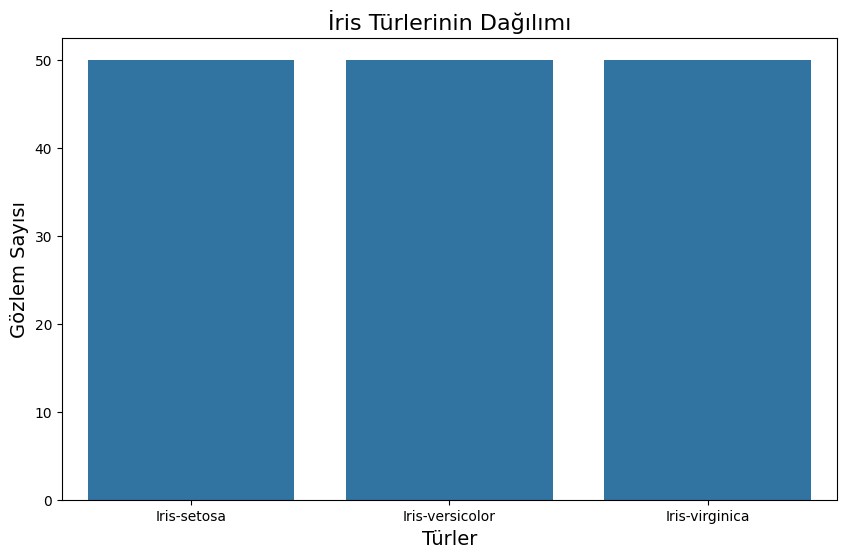

ValueError: No variables found for grid columns.

In [18]:
#iris_df['species'] = iris.target

iris_df = df_iris.select(target_variable_name).toPandas()

# Görselleştirme için gerekli kütüphaneleri yükleme
import seaborn as sns
import matplotlib.pyplot as plt

# Veri seti içindeki sınıfların dağılımını görselleştirme
plt.figure(figsize=(10, 6))
sns.countplot(data=iris_df, x='Species')
plt.xlabel('Türler', fontsize=14)
plt.ylabel('Gözlem Sayısı', fontsize=14)
plt.title('İris Türlerinin Dağılımı', fontsize=16)
plt.show()

# Özellikler arasındaki ilişkiyi gösteren çiftler plotunu çizme
sns.pairplot(data=iris_df, hue='Species')
plt.suptitle('İris Veri Seti Özelliklerinin İlişkisi', fontsize=16)
plt.show()
